In [20]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import layers, regularizers
from keras.datasets import mnist

In [21]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(28, 28, 1))
# "encoded" is the encoded representation of the input
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
# "decoded" is the lossy reconstruction of the input
# at this point the representation is (4, 4, 8) i.e. 128-dimensional
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [22]:
autoencoder.compile(
  optimizer='adam', 
  loss='binary_crossentropy'
)

In [23]:
(X_train, _), (X_test, _) = mnist.load_data()

In [24]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [25]:
history = autoencoder.fit(
  X_train, X_train,
  epochs=50,
  batch_size=256,
  shuffle=True,
  validation_data=(X_test, X_test)
)

Epoch 1/50
235/235 [==============================] - 3s 10ms/step - loss: 0.3839 - val_loss: 0.1679
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1603 - val_loss: 0.1415
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1390 - val_loss: 0.1298
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1293 - val_loss: 0.1244
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1241 - val_loss: 0.1199
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1204 - val_loss: 0.1171
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1174 - val_loss: 0.1148
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1154 - val_loss: 0.1126
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1133 - val_loss: 0.1111
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1116 - val_loss: 0.109

In [26]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 8)           0   

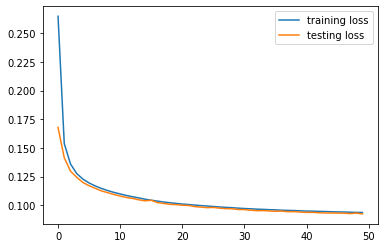

In [27]:
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="testing loss")
plt.legend();

In [28]:
# Decode some digits
# Note that we take them from the *test* set
decoded_imgs = autoencoder.predict(X_test)

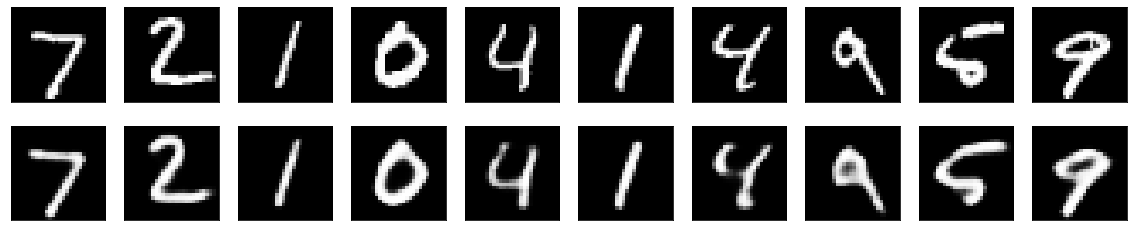

In [29]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [31]:
autoencoder.save("model.h5")